In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from general import *
from train_classifer import classifierCELL, vgg16

In [5]:
run=247
path = f'./images/test_training/runs{run}/'
files = os.listdir(path)
max_epoch = 0
max_ckp = ''
for f in files:
    if f.split('.')[-1] == 'ckp':
        epoch = int(f.split('_')[2][5:])
        if epoch > max_epoch:
            max_epoch = epoch
            max_ckp = f
print(f'max_ckp: {max_ckp}')
device = 'cuda' if torch.cuda.is_available() else 'cpu'
ckp_load = torch.load(path+max_ckp, map_location=device)
print(ckp_load)

max_ckp: tmax10_tstep2_epoch700_tacc0.864_vacc0.478.ckp
classifierCELL(
  (cellnet1): cellmodel(
    (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (A1): Conv2d(3, 3, kernel_size=(5, 5), stride=(1, 1), padding=same)
    (B1): Conv2d(3, 3, kernel_size=(5, 5), stride=(1, 1), padding=same)
    (ode_func): ODEFunc(
      (A1): Conv2d(3, 3, kernel_size=(5, 5), stride=(1, 1), padding=same)
      (B1): Conv2d(3, 3, kernel_size=(5, 5), stride=(1, 1), padding=same)
      (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
  )
  (fc1): Linear(in_features=147, out_features=10, bias=True)
  (relu): ReLU()
  (vgg16): vgg16(
    (features): Sequential(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, 

In [3]:
print(ckp_load.cellnet1.A.weight[0])
# print(ckp_load.cellnet2.A.weight[0])
# print(ckp_load.cellnet3.A.weight[0])

AttributeError: 'cellmodel' object has no attribute 'A'

['data_batch_3', 'data_batch_4', 'data_batch_5', 'data_batch_2', 'data_batch_1']
datasets shape: (10000, 3072), labels shape: (10000,)
dataset shape: (10000, 3, 32, 32), labels shape: (10000,)
(32, 32, 3) -1.0000019 1.0000153
cellnn_out range:  (32, 32, 3) 0 255
cellnn_out_ch0 range:  0 254
cellnn_out_ch1 range:  0 254
cellnn_out_ch2 range:  0 255


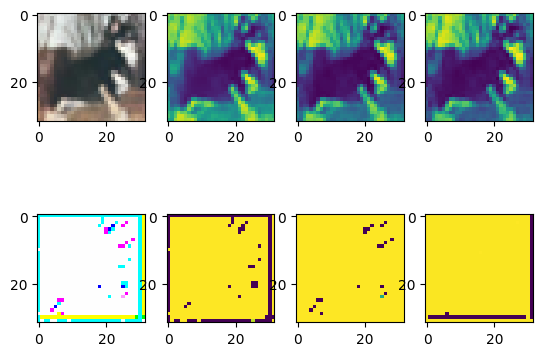

In [5]:
datasets, labels = load_cifar10(path='../dataset/cifar-10-batches-py/', n_batch=1)
datasets = datasets.reshape(datasets.shape[0], 3, 32, 32)/255
print(f'dataset shape: {datasets.shape}, labels shape: {labels.shape}')

idx=126
sig = nn.Sigmoid()
input = torch.tensor(datasets[idx][None, ...], dtype=torch.float).to(device)
x = ckp_load.cellnet1(input)
# x = ckp_load.cellnet2(x)
# x = ckp_load.cellnet3(x)
cellnn_out = x.detach().cpu().numpy()[0].transpose(1, 2, 0)
print(cellnn_out.shape, cellnn_out.min(), cellnn_out.max())

cellnn_out = (cellnn_out - cellnn_out.min())/(cellnn_out.max()-cellnn_out.min())
cellnn_out = (255*cellnn_out).astype(np.uint8)
print('cellnn_out range: ', cellnn_out.shape, cellnn_out.min(), cellnn_out.max())
print('cellnn_out_ch0 range: ', cellnn_out[:,:, 0].min(), cellnn_out[:,:, 0].max())
print('cellnn_out_ch1 range: ', cellnn_out[:,:, 1].min(), cellnn_out[:,:, 1].max())
print('cellnn_out_ch2 range: ', cellnn_out[:,:, 2].min(), cellnn_out[:,:, 2].max())

input = input[0].detach().cpu().numpy().transpose(1,2,0)
fig, ax = plt.subplots(2, 4)
ax[0][0].imshow(input)
ax[1][0].imshow(cellnn_out)
for i in range(3):
    ax[0][i+1].imshow(input[:,:,i])
    ax[1][i+1].imshow(cellnn_out[:,:,i])